# Introduction


The Boston Housing Dataset contains the following columns as per https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollar
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's
    
    

# Dataset Exploration

In [11]:
#please run this to import the necessary packages for this notebook to keep the code concise

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

print("Thank you!")


Thank you!


In [31]:
#load dataset
boston_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
print(boston_data.head()) #prints first 5 rows

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [14]:
boston_data.shape

(506, 14)

In [15]:
boston_data.dropna() #cleanup: delete rows with missing values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [16]:
boston_data.shape #shows number of rows and columns

(506, 14)

Rows and columns have not changed, hence no values were missing

In [18]:
boston_data.describe() #stats overview

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
boston_data.corr() # returns correlation between columns

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


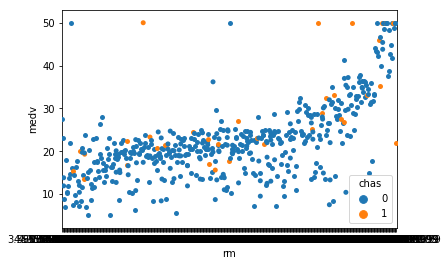

In [21]:
sb.swarmplot(x='rm', y='medv', hue = 'chas', data=boston_data)

There look to be very few houses by the river - indicated by "1". Let's confirm the ratio:

In [22]:
boston_data['chas'].value_counts() #count unique values

0    471
1     35
Name: chas, dtype: int64

In fact, there are only 35 dwellings close to the river included in this dataset.

In [26]:
#separate datasets out
by_river = boston_data[boston_data['chas']==1]
not_river = boston_data[boston_data['chas']==0] 

In [28]:
by_river.describe() #get a stats overview

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.851670,7.714286,12.719143,1.0,0.593426,6.519600,77.50000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000
std,2.494072,18.800143,5.957623,0.0,0.144736,0.876416,22.02134,1.254728,8.248962,165.012004,2.081766,53.382820,6.686651,11.816643
min,0.015010,0.000000,1.210000,1.0,0.401000,5.012000,24.80000,1.129600,1.000000,198.000000,13.600000,88.010000,1.920000,13.400000
25%,0.125060,0.000000,6.410000,1.0,0.489000,5.935500,60.30000,1.904700,4.000000,276.000000,15.650000,376.200000,5.395000,21.100000
50%,0.447910,0.000000,13.890000,1.0,0.550000,6.250000,88.50000,3.048000,5.000000,307.000000,17.600000,390.770000,10.500000,23.300000
75%,3.397665,0.000000,18.100000,1.0,0.693000,6.915000,93.20000,3.897300,8.000000,403.000000,18.600000,393.595000,15.070000,33.150000
max,8.982960,90.000000,19.580000,1.0,0.871000,8.780000,100.00000,5.885000,24.000000,666.000000,20.200000,396.900000,26.820000,50.000000


In [30]:
not_river.describe() #get a stats overview

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,471.000000,471.000000,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3.744447,11.634820,11.019193,0.0,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
std,8.876818,23.617979,6.913850,0.0,0.113102,0.685895,28.458924,2.145567,8.748452,168.853790,2.155958,93.423542,7.169271,8.831362
min,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079640,0.000000,5.040000,0.0,0.448000,5.882000,42.500000,2.105250,4.000000,282.500000,17.400000,375.365000,7.160000,16.600000
50%,0.245220,0.000000,8.560000,0.0,0.538000,6.202000,76.500000,3.215700,5.000000,330.000000,19.100000,391.830000,11.380000,20.900000
75%,3.695030,12.500000,18.100000,0.0,0.624000,6.594000,94.100000,5.287300,24.000000,666.000000,20.200000,396.375000,17.095000,24.800000
max,88.976200,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A quick comparison across the board shows that the river estates cost more on average, despite having roughly the same average of rooms. It appears estates by the river average an older age. Interestingly, the tax appears to be lower.